# 1. Binary Classification ( Predict Pollutants will go up or down)

## Variable List

- Year: from 2000-2010

- Month: Jan-Dec(1-12)

- Weekday: Monday - Sunday(0-6)

- PRCP: Precipitation

- SNOW: Snowfall

- TMAX: Maximum temperature

- TMIN: Minimum temperature

- Holiday: US public holiday

- before_holiday_7: Within 7 days before public holiday

- after_holiday_7: Within 7 days after public holiday

These are some basic variables, we also do feature expansion with different rolling windows, for example, if you set window =7, then rolling with this window, and get the means. Then we can get a new feature. (Moving average with different windows, including weekly, monthly, quarterly and yearly). If is good way to deal with time-series data. 



In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

dff = pd.read_csv('prepared_data.csv')
dff

,date,label,year,month,weekday,day,NO2 Full Mean (standard),NO2 Full 1st Max Value (standard),NO2 Full 1st Max Hour (standard),O3 Full Mean (standard),...,CO Full Mean (standard)_364,CO Full 1st Max Value (standard)_364,CO Full 1st Max Hour (standard)_364,Holiday,PRCP,SNOW,TMAX,TMIN,before_holiday_7,after_holiday_7
0,2000-12-31,19.958333,2000.0,12.0,6.0,31.0,19.666667,28.0,4.0,0.016737,...,1.175696,1.851648,10.767857,1,0.000,0.00,35.0,18.5,False,True
1,2001-01-01,21.625000,2001.0,1.0,0.0,1.0,19.958333,29.0,0.0,0.018208,...,1.173606,1.844780,10.763736,1,0.000,0.00,46.5,21.5,True,False
2,2001-01-02,32.625000,2001.0,1.0,1.0,2.0,21.625000,33.0,7.0,0.015542,...,1.175388,1.842857,10.787088,0,0.000,0.00,46.5,21.5,True,False
3,2001-01-03,39.909091,2001.0,1.0,2.0,3.0,32.625000,47.0,18.0,0.008792,...,1.177577,1.842720,10.754121,0,0.000,0.00,46.5,21.5,True,False
4,2001-01-04,31.625000,2001.0,1.0,3.0,4.0,39.909091,78.0,7.0,0.005042,...,1.179650,1.849725,10.758242,0,0.000,0.00,46.5,21.5,True,False
5,2001-01-05,26.583333,2001.0,1.0,4.0,5.0,31.625000,36.0,2.0,0.003000,...,1.180383,1.849451,10.758242,0,0.000,0.00,46.5,21.5,True,False
6,2001-01-06,41.750000,2001.0,1.0,5.0,6.0,26.583333,39.0,22.0,0.007500,...,1.178643,1.850687,10.776099,0,0.000,0.00,46.5,21.5,True,False
7,2001-01-07,40.666667,2001.0,1.0,6.0,7.0,41.750000,54.0,9.0,0.002292,...,1.182289,1.853709,10.782967,0,0.000,0.00,46.5,21.5,True,False
8,2001-01-08,20.291667,2001.0,1.0,0.0,8.0,40.666667,55.0,7.0,0.003000,...,1.184955,1.857830,10.782967,0,0.000,0.00,46.5,21.5,True,True
9,2001-01-09,26.958333,2001.0,1.0,1.0,9.0,20.291667,28.0,0.0,0.016417,...,1.184342,1.856456,10.782967,0,0.000,0.00,46.5,21.5,False,True


In [2]:
target = 'NO2 Full Mean (standard)'
dff['label'] =  dff['label'] < dff[target]

In [3]:
# This dataset includes 
X = dff.drop(['date','label'],axis=1)
y = dff['label']

# spliting training set, validation set and test set, accounting 0.6, 0.2 and 0.2 respectively
train_begin = 0.6
dev_begin = 0.8

X_train = X[:int(train_begin*len(X))]
y_train = y[:int(train_begin*len(X))]
X_dev  = X[int(train_begin*len(X)):int(dev_begin*len(X))]
y_dev = y[int(train_begin*len(X)):int(dev_begin*len(X))]
X_test = X[int(dev_begin*len(X)):]
y_test = y[int(dev_begin*len(X)):]

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

# Use gradient boosting classification to fit the model
model = GradientBoostingClassifier(max_depth=6,n_estimators=200)
model.fit(X_train,y_train)

# get the feature importance
impos = dict(zip(list(X_train.columns),list(model.feature_importances_)))
impos = sorted(impos.items(),key=lambda x:x[1],reverse=True)
impos = [x[0] for x in impos]

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
impos

['NO2 Full Mean (standard)',
 'NO2 Full 1st Max Hour (standard)',
 'CO Full 1st Max Hour (standard)',
 'NO2 Full 1st Max Value (standard)',
 'weekday',
 'CO Full 1st Max Value (standard)',
 'CO Full Mean (standard)',
 'O3 Full 1st Max Value (standard)',
 'SO2 Full Mean (standard)',
 'O3 Full 1st Max Hour (standard)',
 'SO2 Full 1st Max Value (standard)',
 'O3 Full Mean (standard)',
 'O3 Full Mean (standard)_7',
 'CO Full 1st Max Hour (standard)_91',
 'SO2 Full 1st Max Hour (standard)_91',
 'NO2 Full 1st Max Value (standard)_7',
 'NO2 Full 1st Max Value (standard)_28',
 'CO Full 1st Max Hour (standard)_7',
 'TMIN',
 'SO2 Full 1st Max Hour (standard)_7',
 'NO2 Full 1st Max Hour (standard)_364',
 'CO Full 1st Max Hour (standard)_28',
 'NO2 Full 1st Max Hour (standard)_7',
 'O3 Full 1st Max Hour (standard)_28',
 'SO2 Full 1st Max Value (standard)_28',
 'SO2 Full 1st Max Hour (standard)_28',
 'CO Full Mean (standard)_7',
 'SO2 Full 1st Max Hour (standard)',
 'SO2 Full 1st Max Value (standar

In [6]:
import matplotlib.pyplot as plt

#Select top 20 features to predict the test set. 
#cols = impos[:np.argmin(np.array(rmses))+1]
cols = impos[:20]
X_train2 = X_train[cols].copy()
X_test2 = X_test[cols].copy()
model = GradientBoostingClassifier(max_depth=6,n_estimators=100)
model.fit(X_train2,y_train)
preds = model.predict(X_test2)
print(classification_report(y_test,preds))

             precision    recall  f1-score   support

      False       0.68      0.77      0.72       369
       True       0.71      0.61      0.66       349

avg / total       0.69      0.69      0.69       718



In [7]:
dff['label'].value_counts()

False    1804
True     1786
Name: label, dtype: int64

In [8]:
y_train.value_counts()

False    1078
True     1076
Name: label, dtype: int64

In [9]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /anaconda3/lib/python3.7/site-packages (20.0.2)


In [10]:
!pip install -U tqdm

Requirement already up-to-date: tqdm in /anaconda3/lib/python3.7/site-packages (4.43.0)


In [11]:
!pip install shap

In [12]:
import shap
shap.initjs()

In [13]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test2)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [14]:
X_test2.iloc[0,:]

NO2 Full Mean (standard)                15.916667
NO2 Full 1st Max Hour (standard)         2.000000
CO Full 1st Max Hour (standard)          1.000000
NO2 Full 1st Max Value (standard)       28.000000
weekday                                  3.000000
CO Full 1st Max Value (standard)         2.750000
CO Full Mean (standard)                  2.564583
O3 Full 1st Max Value (standard)         0.031000
SO2 Full Mean (standard)                 6.020834
O3 Full 1st Max Hour (standard)         10.000000
SO2 Full 1st Max Value (standard)        9.300000
O3 Full Mean (standard)                  0.025333
O3 Full Mean (standard)_7                0.016226
CO Full 1st Max Hour (standard)_91       9.115385
SO2 Full 1st Max Hour (standard)_91     11.675824
NO2 Full 1st Max Value (standard)_7     36.000000
NO2 Full 1st Max Value (standard)_28    31.285714
CO Full 1st Max Hour (standard)_7       12.714286
TMIN                                    25.500000
SO2 Full 1st Max Hour (standard)_7      12.785714


In [15]:
ii = 11
shap.force_plot(explainer.expected_value, shap_values[ii,:], X_test2.iloc[ii,:])

In [16]:
shap_values[11]

array([ 1.56035171,  0.66010782,  0.16590299,  0.29762715, -0.39033968,
        0.16209458, -1.02976935,  0.09901456,  0.0040222 ,  2.02987661,
       -0.04437359,  0.0049957 , -0.03814811, -0.07337933,  0.03322906,
       -0.08804545,  0.14826902,  0.09092339, -0.45911464, -0.13309453])

In [17]:
shap.force_plot(explainer.expected_value, shap_values, X_test2)

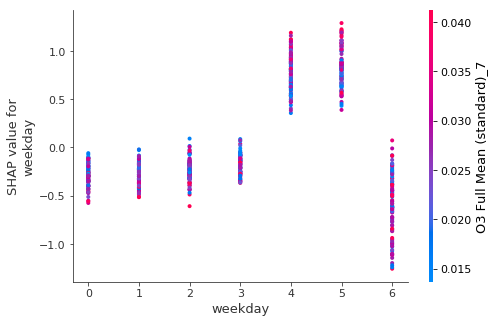

In [18]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("weekday", shap_values, X_test2)

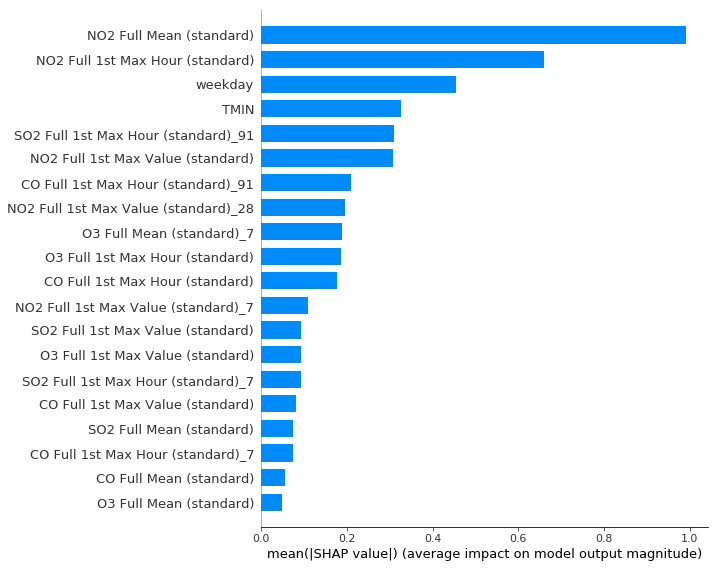

In [19]:
shap.summary_plot(shap_values,X_test2,plot_type = "bar")

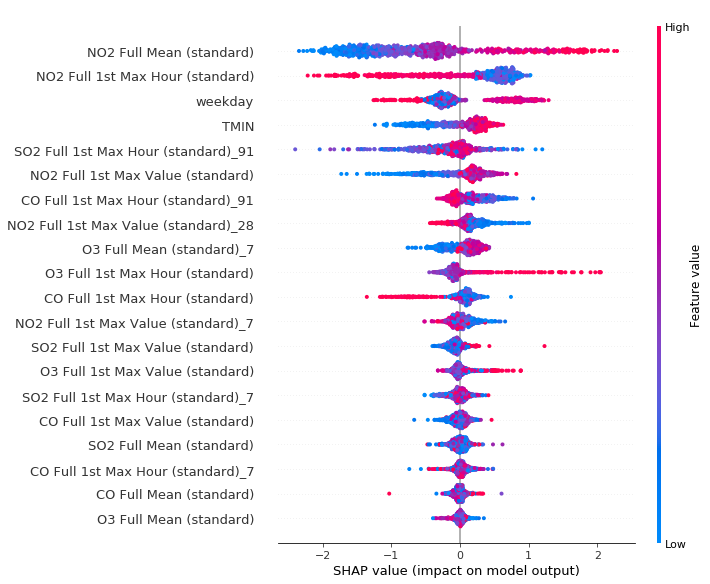

In [20]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_test2)

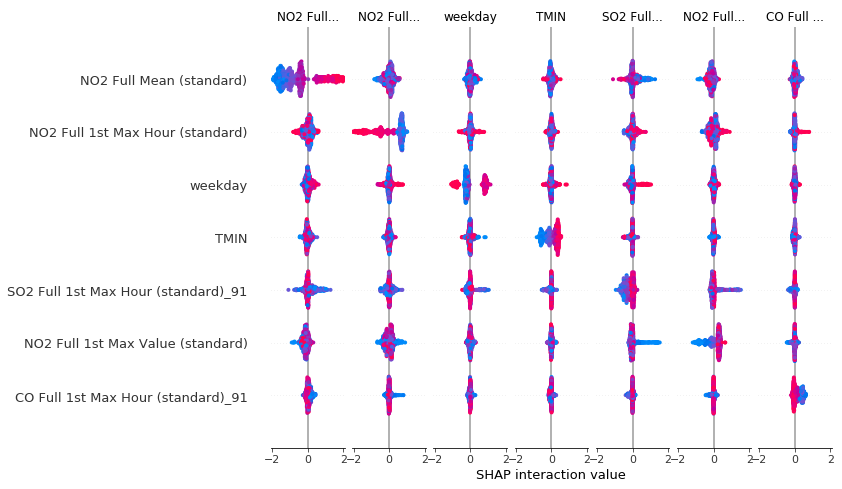

In [21]:
shap_interaction_values = explainer.shap_interaction_values(X_test2)
shap.summary_plot(shap_interaction_values, X_test2)

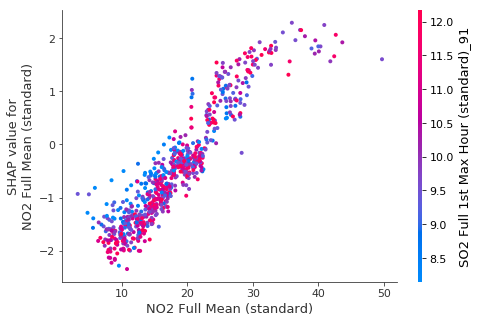

In [22]:
shap.dependence_plot("NO2 Full Mean (standard)",shap_values, X_test2)